## Wedding Tables with Social Network Analysis

In [1]:
import networkx as nx
import pandas as pd
print(nx.__version__) # built for 2.1

2.1


In [46]:

df = pd.read_csv('Desktop/guests.csv')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, create_using=Graphtype)


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


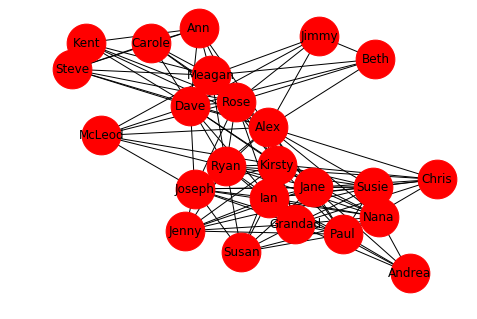

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

#Visualize Network
#nx.draw(G) # Default visualization
#nx.draw(G, pos=nx.circular_layout(G)) # Demonstrates layout options
nx.draw(G, node_size = 1500, node_color = 'red', with_labels = True, pos=nx.spring_layout(G), edge_attr='weight')


# Recreation of slide

In [48]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
communities = sorted(map(sorted, top_level_communities))
communities

[['Alex',
  'Ann',
  'Beth',
  'Carole',
  'Dave',
  'Jimmy',
  'Kent',
  'McLeod',
  'Meagan',
  'Rose',
  'Steve'],
 ['Andrea',
  'Chris',
  'Grandad',
  'Ian',
  'Jane',
  'Jenny',
  'Joseph',
  'Kirsty',
  'Nana',
  'Paul',
  'Ryan',
  'Susan',
  'Susie']]

In [49]:
import itertools

k = 6
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 

(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Andrea', 'Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['Andrea'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['McLeod'], ['Andrea'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Kent', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['McLeod'], ['Jimmy'], ['Andrea'])
(['Alex', 'Ann', 'Carole', 'Dave', 'Kent', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph'

In [50]:
no_tables = 4
fluid_communities = community.asyn_fluidc(G, k = no_tables, max_iter=100)

for element in fluid_communities:
     print(element)

{'Rose', 'Ann', 'Carole', 'Steve'}
{'Alex', 'Dave', 'Kent', 'McLeod', 'Meagan'}
{'Jimmy', 'Beth'}
{'Ryan', 'Joseph', 'Nana', 'Susie', 'Jenny', 'Grandad', 'Ian', 'Kirsty', 'Susan', 'Jane', 'Chris', 'Paul', 'Andrea'}
